# Decision trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    flip_y=0.1
)

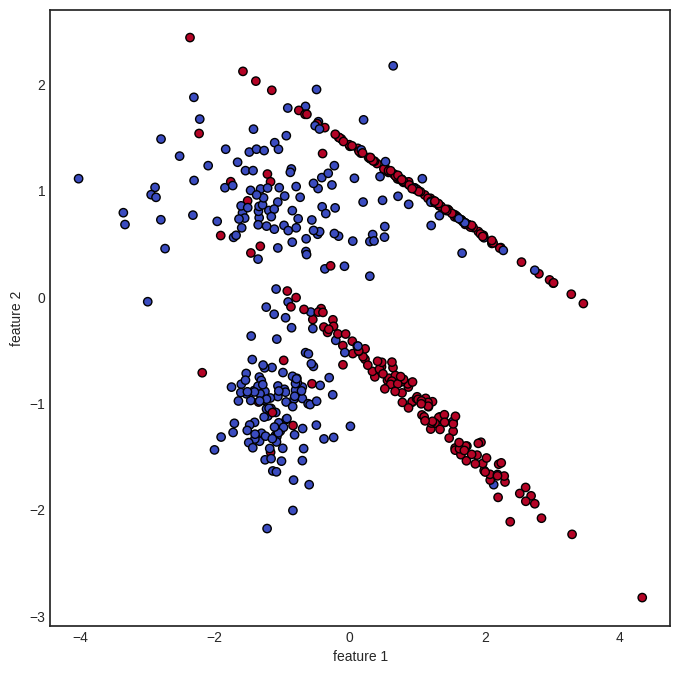

In [2]:
with plt.style.context("seaborn-v0_8-white"):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.show()

In [3]:
from mlfz.classical.tree.cart import ClassificationTree

In [4]:
from mlfz.scores import accuracy

In [10]:
tree = ClassificationTree(max_depth=5)
y_pred = tree.fit_predict(X, y)
accuracy(y_pred, y)

np.float64(0.904)

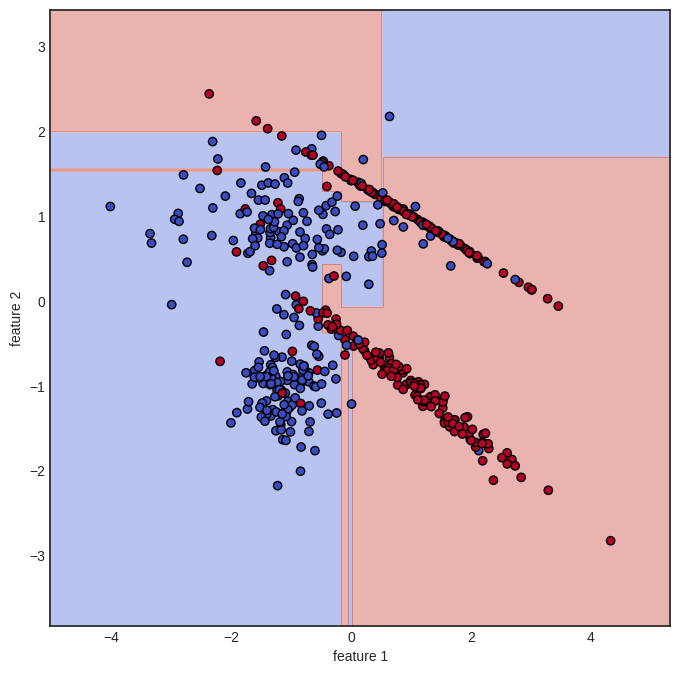

In [11]:
def plot_decision_boundary(tree, X, y, resolution=0.01):
    with plt.style.context("seaborn-v0_8-white"):
        plt.figure(figsize=(8, 8))
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # Generate a grid of points with the given resolution
        xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                            np.arange(y_min, y_max, resolution))

        # Predict classes for each point in the grid
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

        # Plot the original dataset
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
        plt.xlabel("feature 1")
        plt.ylabel("feature 2")
        plt.show()

plot_decision_boundary(tree, X, y)


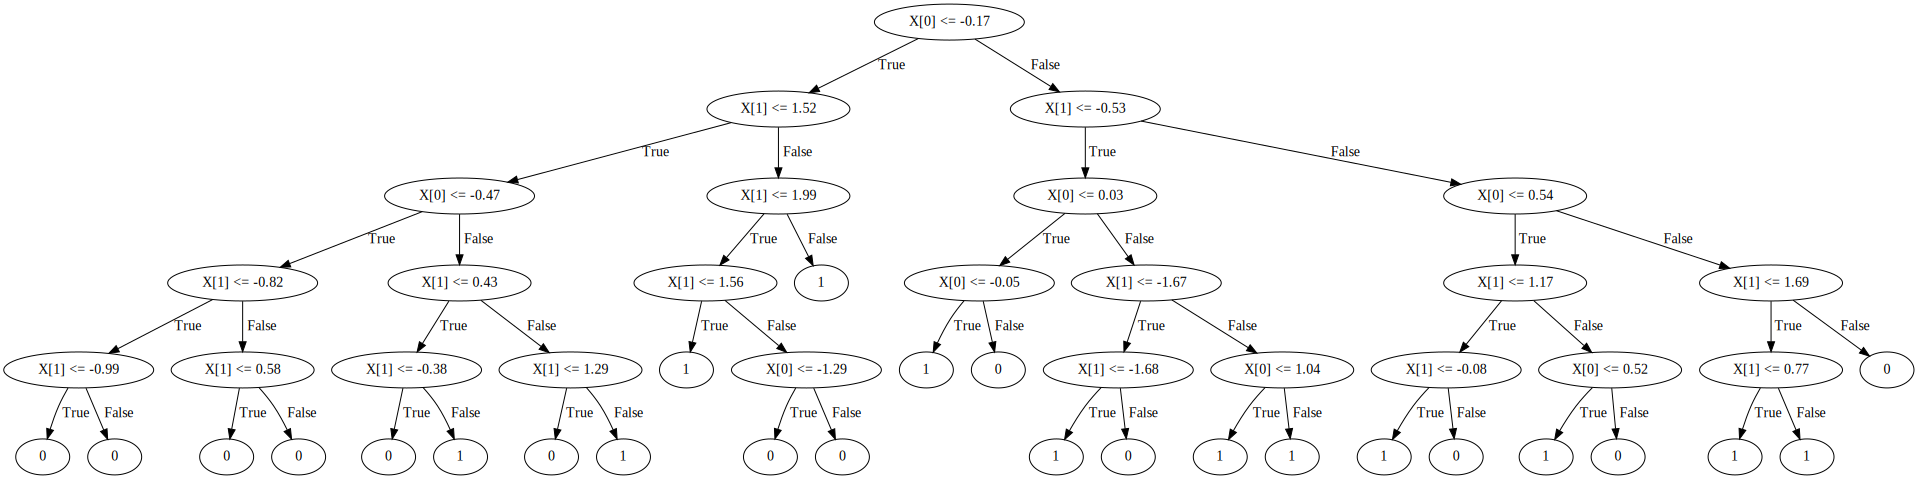

In [12]:
tree.digraph